In [1]:
import pandas as pd
import geopandas 
import pysal as ps 
block_grp = geopandas.read_file("2018NYblockgrpSF/tl_2018_36_bg.shp")
block_grp = block_grp.rename(columns={'TRACTCE': 'Tract', 'BLKGRPCE': 'Block'})
erie_county_blockGrp = block_grp[(block_grp.COUNTYFP == "029")]
buffalo_tracts = pd.read_csv("2018NYblockgrpSF/Tracts_data.csv")
buffalo_tracts['TRACT'] = buffalo_tracts['TRACT'].apply(lambda x: str(x).zfill(6))
buffalo = erie_county_blockGrp.loc[erie_county_blockGrp.Tract.isin(list(buffalo_tracts['TRACT']))]
buffalo['unique'] = buffalo['Tract'] + buffalo['Block']

C:\Users\Voltaire Vergara\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [2]:
aa_df = pd.read_csv('aa_population_2013_to_2018.csv')
aa_df['unique']= aa_df['unique'].apply(lambda x: str(x).zfill(7))
aa_df = aa_df.set_index('unique')
buffalo2 = pd.merge(aa_df,buffalo, on = 'unique')
Q_w = ps.lib.weights.Queen.from_dataframe(buffalo2, idVariable='unique')

In [28]:
buffalo.to_file("buffalo.shp")

In [4]:
Q_w.transform = 'r'

In [5]:
aa2013lag = ps.lib.weights.lag_spatial(Q_w,buffalo2['aa2013'])

In [9]:
aa2013lagQ10 = ps.viz.mapclassify.Quantiles(aa2013lag, k = 10)

In [12]:
import numpy as np
aa2013 = buffalo2['aa2013']
b,a = np.polyfit(aa2013,aa2013lag,1)

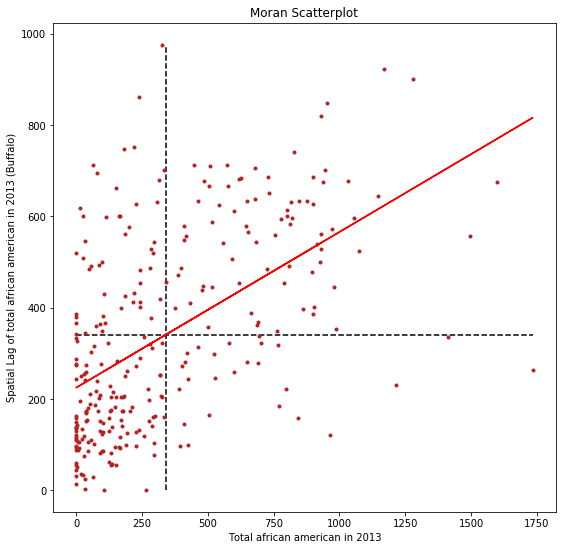

In [19]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, figsize = (9,9))

plt.plot(aa2013,aa2013lag,'.',color = 'firebrick')
plt.vlines(aa2013.mean(),aa2013lag.min(),aa2013lag.max(),linestyle ='--')
plt.hlines(aa2013lag.mean(),aa2013.min(),aa2013.max(),linestyle='--')
plt.plot(aa2013,a+b*aa2013,"r")
plt.title("Moran Scatterplot")
plt.ylabel("Spatial Lag of total african american in 2013 (Buffalo)")
plt.xlabel("Total african american in 2013")
plt.show
plt.savefig("MORANS_SCATTERPLOT_AA.png")

In [24]:
I_aa2013 = ps.explore.esda.Moran(aa2013.values,Q_w)

In [27]:
I_aa2013.I, I_aa2013.p_sim # we reject the null randomness is not true 
# that means population of african americans are not govern by spatial randomness 

(0.34077530306840237, 0.001)

In [21]:
aa2013lag = ps.lib.weights.lag_spatial(Q_w,aa_df['aa2013'])

0.3407753030684025

In [22]:
aa2013lag 

array([528.66666667, 862.        , 571.57142857, 634.6       ,
       455.        , 631.2       , 479.16666667, 676.66666667,
       593.71428571, 676.        , 500.33333333, 630.8       ,
       387.        , 661.66666667, 322.25      , 186.75      ,
       113.5       , 282.5       , 412.        , 562.        ,
       618.71428571, 577.        , 362.        , 322.83333333,
       335.66666667, 634.33333333, 297.66666667, 377.        ,
       519.44444444, 484.16666667, 253.6       , 323.66666667,
       206.2       , 259.71428571, 321.        , 253.6       ,
       426.4       , 411.        , 222.        , 500.        ,
       207.5       , 181.27272727, 119.        , 249.71428571,
       141.5       , 204.4       , 222.42857143, 122.        ,
       349.        , 161.25      , 138.        , 127.        ,
       170.        , 125.83333333,  86.33333333, 204.33333333,
       241.        ,  96.85714286, 161.5       , 365.5       ,
       314.28571429, 141.5       , 276.85714286,  77.12

In [23]:
buffalo

,STATEFP,COUNTYFP,Tract,Block,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,unique
74,36,029,016800,2,360290168002,Block Group 2,G5030,S,418211,0,+42.9087575,-078.8646381,"POLYGON ((-78.86818 42.90460, -78.86817 42.904...",0168002
75,36,029,016800,1,360290168001,Block Group 1,G5030,S,465466,0,+42.9068994,-078.8581310,"POLYGON ((-78.86255 42.90486, -78.86253 42.905...",0168001
76,36,029,016800,4,360290168004,Block Group 4,G5030,S,408133,0,+42.9125673,-078.8583172,"POLYGON ((-78.86244 42.90997, -78.86244 42.910...",0168004
817,36,029,006602,1,360290066021,Block Group 1,G5030,S,155932,0,+42.9143061,-078.8732873,"POLYGON ((-78.87706 42.91411, -78.87705 42.915...",0066021
835,36,029,016900,4,360290169004,Block Group 4,G5030,S,188964,0,+42.9217360,-078.8645317,"POLYGON ((-78.87063 42.92298, -78.86978 42.923...",0169004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12711,36,029,002800,3,360290028003,Block Group 3,G5030,S,113925,0,+42.8983741,-078.8162956,"POLYGON ((-78.81811 42.90052, -78.81695 42.900...",0028003
13523,36,029,016300,1,360290163001,Block Group 1,G5030,S,873936,0,+42.8739333,-078.8382098,"POLYGON ((-78.84525 42.87077, -78.84522 42.870...",0163001
13524,36,029,016700,3,360290167003,Block Group 3,G5030,S,1544415,0,+42.8788022,-078.8088326,"POLYGON ((-78.81998 42.87206, -78.81815 42.874...",0167003
13525,36,029,016400,4,360290164004,Block Group 4,G5030,S,657483,0,+42.8777726,-078.8628328,"POLYGON ((-78.87052 42.87688, -78.87050 42.876...",0164004
